In [1]:
import os
os.chdir('..')
from src.feature_engineering import freture_extract_All
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Show more columns
pd.set_option('display.max_columns', None) 

# Show more rows
pd.set_option('display.max_rows', 100) 

In [10]:
df = pd.read_csv('processed_data/merged_data_example.csv')
web_app_merged = pd.read_csv('processed_data/web_app_merged.csv')
claims_features = pd.read_csv('processed_data/claims_features.csv')
churn_label = pd.read_csv('data/churn_labels.csv')

# Test when filter only close events (1 Day)

In [11]:
df['timestamp_web'] = pd.to_datetime(df['timestamp_web'])
df['timestamp_app'] = pd.to_datetime(df['timestamp_app'])
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])

df_filtered = df[
    (df['timestamp_web'].dt.date == df['timestamp_app'].dt.date)
]

In [12]:
web_app_merged['timestamp_web'] = pd.to_datetime(web_app_merged['timestamp_web'])
web_app_merged['timestamp_app'] = pd.to_datetime(web_app_merged['timestamp_app'])

time_diff = abs(pd.to_datetime(web_app_merged['timestamp_web']) - pd.to_datetime(web_app_merged['timestamp_app']))

web_app_merged_filtered = web_app_merged[time_diff <= pd.Timedelta(days=1)]


df_filtered2 = pd.get_dummies(web_app_merged_filtered, columns=['title'], drop_first=True, prefix='titlerelevent_').drop(columns=['url', 'description'])
title_cols = [col for col in df_filtered2.columns if col.startswith('titlerelevent_')]

df_filtered2 = df_filtered2.groupby(['member_id']).agg(
    **{col: ('titlerelevent_' + col.split('_', 1)[1], 'sum') for col in title_cols}
).reset_index()
df_filtered2 = df_filtered2.merge(churn_label, on='member_id', how='right').fillna(0).drop(columns=['signup_date'])
df_filtered2

,member_id,titlerelevent__Budget planning,titlerelevent__Cardio workouts,titlerelevent__Cardiometabolic health,titlerelevent__Cholesterol friendly foods,titlerelevent__Diabetes management,titlerelevent__Dog training,titlerelevent__Electric vehicles,titlerelevent__Exercise routines,titlerelevent__Gadget roundup,titlerelevent__Game reviews,titlerelevent__HbA1c targets,titlerelevent__Healthy eating guide,titlerelevent__High-fiber meals,titlerelevent__Hypertension basics,titlerelevent__Lowering blood pressure,titlerelevent__Match highlights,titlerelevent__Meditation guide,titlerelevent__Mediterranean diet,titlerelevent__New releases,titlerelevent__Restorative sleep tips,titlerelevent__Sleep hygiene,titlerelevent__Strength training basics,titlerelevent__Stress reduction,titlerelevent__Top destinations,titlerelevent__Weight management,churn,outreach
0,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,4.0,0.0,0.0,0,0
2,3,3.0,5.0,1.0,3.0,0.0,5.0,5.0,1.0,4.0,12.0,1.0,0.0,2.0,1.0,2.0,4.0,5.0,2.0,6.0,3.0,2.0,0.0,0.0,6.0,0.0,0,0
3,4,3.0,0.0,3.0,0.0,2.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1,0
4,5,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0,0
9996,9997,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0,0
9997,9998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0,0
9998,9999,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,2.0,3.0,0.0,4.0,3.0,0.0,3.0,0.0,3.0,5.0,3.0,1.0,1.0,0.0,0.0,0.0,0,0


In [13]:
df_filtered = pd.get_dummies(df_filtered, columns=['title'], drop_first=True).drop(columns=['url', 'description'])
title_cols = [col for col in df_filtered.columns if col.startswith('title_')]
df_filtered = pd.get_dummies(df_filtered, columns=['icd_code'], drop_first=True)
code_cols = [col for col in df_filtered.columns if col.startswith('icd_code_')]
df_filtered = df_filtered.groupby(['member_id', 'churn', 'outreach']).agg(
    **{col: ('title_' + col.split('_', 1)[1], 'sum') for col in title_cols},
    **{col: ('icd_code_' + col.split('_', 2)[2], 'max') for col in code_cols}
).reset_index()

In [14]:
df_filtered.drop(columns=['outreach', 'churn'], inplace=True)
df_filtered

,member_id,title_Budget planning,title_Cardio workouts,title_Cardiometabolic health,title_Cholesterol friendly foods,title_Diabetes management,title_Dog training,title_Electric vehicles,title_Exercise routines,title_Gadget roundup,title_Game reviews,title_HbA1c targets,title_Healthy eating guide,title_High-fiber meals,title_Hypertension basics,title_Lowering blood pressure,title_Match highlights,title_Meditation guide,title_Mediterranean diet,title_New releases,title_Restorative sleep tips,title_Sleep hygiene,title_Strength training basics,title_Stress reduction,title_Top destinations,title_Weight management,icd_code_B34.9,icd_code_E11.9,icd_code_H10.9,icd_code_I10,icd_code_J00,icd_code_K21.9,icd_code_M54.5,icd_code_R51,icd_code_Z71.3
0,1,0,0,0,0,9,0,0,0,9,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,False,True,False,True,True,False,True,False,True
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,27,0,0,27,0,0,False,True,False,True,False,True,False,True,True
2,3,4,8,0,4,0,12,12,4,12,28,4,0,4,4,4,8,12,4,12,4,4,0,0,4,0,False,True,False,False,False,True,True,False,False
3,4,8,0,4,0,4,0,12,0,0,4,0,0,0,0,0,0,0,0,0,4,4,0,4,0,0,False,False,False,True,True,False,False,False,False
4,5,0,0,0,0,14,7,0,0,0,0,0,0,0,0,0,14,0,0,7,0,14,0,0,0,0,False,True,False,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840,9996,0,8,0,0,0,0,8,0,0,0,0,0,0,0,8,0,0,0,8,0,8,0,0,0,0,True,True,False,False,True,False,False,True,True
9841,9997,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,15,0,5,0,0,0,0,0,5,0,False,True,False,False,False,True,False,True,True
9842,9998,0,0,0,0,0,14,0,0,42,0,0,0,0,0,42,0,0,0,0,28,0,0,0,42,0,True,False,True,False,True,True,True,True,True
9843,9999,0,0,0,0,0,0,6,0,0,0,18,0,0,18,0,6,0,18,12,18,0,0,0,0,0,False,False,False,False,False,True,True,False,True


In [15]:
df = df_filtered2.merge(claims_features, on='member_id', how='left').fillna(0)
df

,member_id,titlerelevent__Budget planning,titlerelevent__Cardio workouts,titlerelevent__Cardiometabolic health,titlerelevent__Cholesterol friendly foods,titlerelevent__Diabetes management,titlerelevent__Dog training,titlerelevent__Electric vehicles,titlerelevent__Exercise routines,titlerelevent__Gadget roundup,titlerelevent__Game reviews,titlerelevent__HbA1c targets,titlerelevent__Healthy eating guide,titlerelevent__High-fiber meals,titlerelevent__Hypertension basics,titlerelevent__Lowering blood pressure,titlerelevent__Match highlights,titlerelevent__Meditation guide,titlerelevent__Mediterranean diet,titlerelevent__New releases,titlerelevent__Restorative sleep tips,titlerelevent__Sleep hygiene,titlerelevent__Strength training basics,titlerelevent__Stress reduction,titlerelevent__Top destinations,titlerelevent__Weight management,churn,outreach,icd_code_A09,icd_code_B34.9,icd_code_E11.9,icd_code_H10.9,icd_code_I10,icd_code_J00,icd_code_K21.9,icd_code_M54.5,icd_code_R51,icd_code_Z71.3,code_count,priority_condition_count
0,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,3.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,4.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,3.0
2,3,3.0,5.0,1.0,3.0,0.0,5.0,5.0,1.0,4.0,12.0,1.0,0.0,2.0,1.0,2.0,4.0,5.0,2.0,6.0,3.0,2.0,0.0,0.0,6.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
3,4,3.0,0.0,3.0,0.0,2.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0
4,5,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,2.0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,2.0
9996,9997,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0
9997,9998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0
9998,9999,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,2.0,3.0,0.0,4.0,3.0,0.0,3.0,0.0,3.0,5.0,3.0,1.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0


In [16]:
df_filtered

,member_id,title_Budget planning,title_Cardio workouts,title_Cardiometabolic health,title_Cholesterol friendly foods,title_Diabetes management,title_Dog training,title_Electric vehicles,title_Exercise routines,title_Gadget roundup,title_Game reviews,title_HbA1c targets,title_Healthy eating guide,title_High-fiber meals,title_Hypertension basics,title_Lowering blood pressure,title_Match highlights,title_Meditation guide,title_Mediterranean diet,title_New releases,title_Restorative sleep tips,title_Sleep hygiene,title_Strength training basics,title_Stress reduction,title_Top destinations,title_Weight management,icd_code_B34.9,icd_code_E11.9,icd_code_H10.9,icd_code_I10,icd_code_J00,icd_code_K21.9,icd_code_M54.5,icd_code_R51,icd_code_Z71.3
0,1,0,0,0,0,9,0,0,0,9,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,False,True,False,True,True,False,True,False,True
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,27,0,0,27,0,0,False,True,False,True,False,True,False,True,True
2,3,4,8,0,4,0,12,12,4,12,28,4,0,4,4,4,8,12,4,12,4,4,0,0,4,0,False,True,False,False,False,True,True,False,False
3,4,8,0,4,0,4,0,12,0,0,4,0,0,0,0,0,0,0,0,0,4,4,0,4,0,0,False,False,False,True,True,False,False,False,False
4,5,0,0,0,0,14,7,0,0,0,0,0,0,0,0,0,14,0,0,7,0,14,0,0,0,0,False,True,False,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840,9996,0,8,0,0,0,0,8,0,0,0,0,0,0,0,8,0,0,0,8,0,8,0,0,0,0,True,True,False,False,True,False,False,True,True
9841,9997,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,15,0,5,0,0,0,0,0,5,0,False,True,False,False,False,True,False,True,True
9842,9998,0,0,0,0,0,14,0,0,42,0,0,0,0,0,42,0,0,0,0,28,0,0,0,42,0,True,False,True,False,True,True,True,True,True
9843,9999,0,0,0,0,0,0,6,0,0,0,18,0,0,18,0,6,0,18,12,18,0,0,0,0,0,False,False,False,False,False,True,True,False,True


Classification Report:
              precision    recall  f1-score   support

    no_churn       0.83      0.62      0.71      2659
       churn       0.25      0.51      0.34       674

    accuracy                           0.60      3333
   macro avg       0.54      0.57      0.52      3333
weighted avg       0.72      0.60      0.63      3333


AUC Score: 0.5958


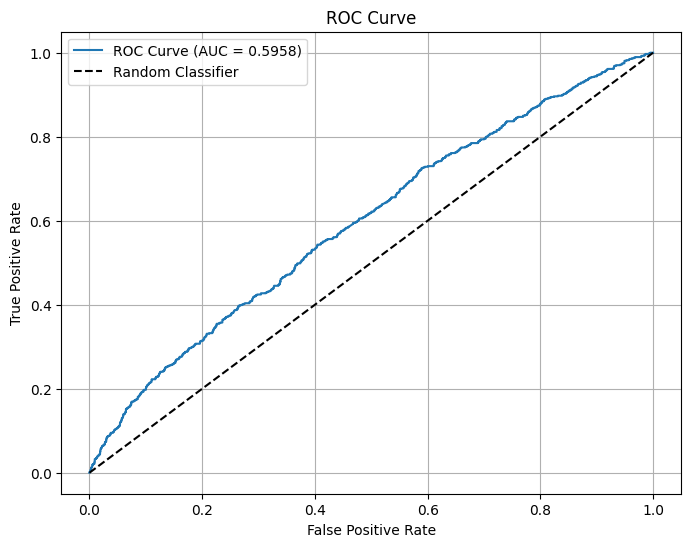

In [17]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

X = df_filtered2.drop(columns=['churn', 'member_id'])
y = df_filtered2['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3333, random_state=42, stratify=y  
)

import xgboost as xgb
scale_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    scale_pos_weight=scale_weight
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Classification Report
print("Classification Report:")
print(classification_report(
    y_test, 
    y_pred, 
    target_names=['no_churn', 'churn'],
    digits=2
))

# AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc:.4f}")

# Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',  # Handles imbalance
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

print("=" * 60)
print("RANDOM FOREST RESULTS")
print("=" * 60)
print(classification_report(y_test, y_pred_rf, target_names=['no_churn', 'churn'], digits=2))
print(f"\nAUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

RANDOM FOREST RESULTS
              precision    recall  f1-score   support

    no_churn       0.83      0.74      0.78      2659
       churn       0.28      0.41      0.34       674

    accuracy                           0.67      3333
   macro avg       0.56      0.57      0.56      3333
weighted avg       0.72      0.67      0.69      3333


AUC Score: 0.6077
